In [29]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('disparos_policia_EEUU.csv', parse_dates=["date"])
df[df['id'].duplicated()]  #No hay duplicados en ID

Empty DataFrame
Columns: [id, name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera, longitude, latitude, is_geocoding_exact]
Index: []

In [22]:
listyear = list()
for x in df["date"]:
    listyear.append(x.year)
df["year"] = listyear

In [23]:
pd.set_option('display.max_rows', None)
print("SIN REPORTE DE LATITUDES:", df[df.latitude.isnull()].id.count())
df[df.latitude.isnull()]

SIN REPORTE DE LATITUDES: 314


id                           name       date   manner_of_death  \
1370  1552                Norman Campbell 2016-05-21              shot   
1372  1556                    Mark Nelson 2016-05-21              shot   
1374  1555                 Jorge Zambrano 2016-05-22              shot   
1387  1572                Fernando Castro 2016-05-26              shot   
1401  1586                Michael Johnson 2016-06-01              shot   
1408  1594                 Demarco Rhymes 2016-06-04              shot   
1422  1615                            NaN 2016-06-09              shot   
1441  1627              Michael Rasmussen 2016-06-15              shot   
1445  1837                 Ronald Delfino 2016-06-16              shot   
1472  1661              Rodrigo Guardiola 2016-06-25  shot and Tasered   
1475  1659             Germichael Kennedy 2016-06-26              shot   
1494  1682    Jai Lateef Solveig Williams 2016-07-02              shot   
1508  1696               Thomas Vandemark 2016-07-06              shot   
1519  1711           Larry Darnell Gordon 2016-07-11              shot   
1530  1718              Gavin Eugene Long 2016-07-17              shot   
1536  1725          Paul Edward Yacabitis 2016-07-22              shot   
1554  1742                    Paul O'Neal 2016-07-28              shot   
1574  1761                   E.J. Walters 2016-08-03              shot   
1606  2145                 John O'Handley 2016-08-16              shot   
1628  2144                David Coborubio 2016-08-25              shot   
1699  1904             Keith Lamont Scott 2016-09-20              shot   
1748  1957              Michael L. Taylor 2016-10-11              shot   
1795  2005         Michael Dale Vance Jr. 2016-10-30              shot   
1806  2016                 Manuel Rosales 2016-11-04              shot   
1808  2020               James Carl Coale 2016-11-05              shot   
1854  2066            Ivory C. Pantallion 2016-11-22              shot   
1880  2097               Derek Lynn Scott 2016-12-02              shot   
1890  2111                Daniel Riedmann 2016-12-07              shot   
1897  2113                Waltki Williams 2016-12-10              shot   
1899  2118          Randy Lee Cumberledge 2016-12-11              shot   
1910  2138           Jeremiah N. Anderson 2016-12-16              shot   
1921  2146                  Ian Shea King 2016-12-21              shot   
1949  2183          Jason Michael Robison 2016-12-31              shot   
2023  2260               Micah R. Lambert 2017-01-25              shot   
2048  2285                        Yia Lee 2017-02-03              shot   
2050  2294            Jamake Cason Thomas 2017-02-03              shot   
2102  2710       Jonathon  Daniel Simmons 2017-02-16              shot   
2105  2363               Jean R. Valescot 2017-02-17              shot   
2111  2360                     Kyle Riggs 2017-02-19              shot   
2136  2382             James Leroy Marker 2017-02-26              shot   
2229  2487         Richard Xavier Summers 2017-04-06              shot   
2249  2713         Michael Zennie Dial II 2017-04-17              shot   
2266  2714                 Daezion Turner 2017-04-24              shot   
2279  2539                 Gene Bernhardt 2017-04-29              shot   
2344  2618                     Shawn Buck 2017-05-25              shot   
2345  2614                  Hector Gamboa 2017-05-26              shot   
2396  2662                    Barry Jones 2017-06-13              shot   
2399  2667            James T. Hodgkinson 2017-06-14              shot   
2459  2742                Alexander Bonds 2017-07-05              shot   
2469  2765         Kareem Ali Nadir Jones 2017-07-07              shot   
2470  2757           Michael Anthony Rude 2017-07-08              shot   
2474  2754                  Robert Yeiser 2017-07-09              shot   
2478  2764          Gregory Shawn Thrower 2017-07-10              shot   
2479  2766  

In [24]:
#MAL REPORTADA GEOLOCALIZACION DE 1 TIROTEO
disparostiritos = df.dropna(subset=["latitude","longitude"])
disparosdf_map = folium.Map(location = [-100, 40], zoom_start = 2)

tiritos = plugins.MarkerCluster().add_to(disparosdf_map)

for lat, lng, label in zip(disparostiritos["latitude"],disparostiritos["longitude"], disparostiritos['id']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup = label
    ).add_to(tiritos)

disparosdf_map

## Total hombres VS mujeres 

Hay muchos más hombres que mujeres tiroteados

M    6303
F     294
Name: gender, dtype: int64


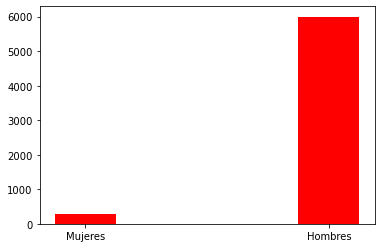

In [47]:
print(df['gender'].value_counts())
plt.bar(["Mujeres","Hombres"],
        disparostiritos["gender"].value_counts().sort_index(),
        0.25,
        color="red")
plt.show()

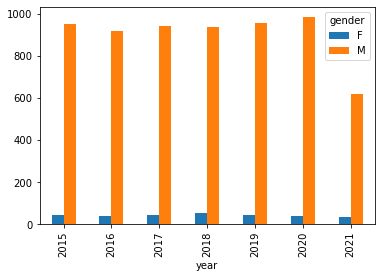

year  gender
2015  M         952
      F          42
2016  M         917
      F          40
2017  M         939
      F          45
2018  M         938
      F          52
2019  M         956
      F          43
2020  M         983
      F          38
2021  M         618
      F          34
Name: gender, dtype: int64


In [49]:
años = df["year"].value_counts()
genero = df['gender']
df.groupby(["year", genero]).size().unstack(level=1).plot(kind='bar')
plt.show()
print(df.groupby('year')['gender'].value_counts())

# Estados y muertes por tiroteo 

-California está muy por encima del resto de Estados

In [80]:
total = df['state'].value_counts().sum()
ordenados = df['state'].value_counts()

for i,k in zip(ordenados.iloc[:15], ordenados.iloc[:15].index):
    print(k,round(i/total*100,2),"%")
    
counter = 0
for i in ordenados.iloc[15:]:
    counter+=i
print("RESTO",round(counter/total*100,2),"%")

CA 14.76 %
TX 8.91 %
FL 6.52 %
AZ 4.58 %
GA 3.68 %
CO 3.59 %
OK 2.89 %
OH 2.82 %
NC 2.8 %
WA 2.7 %
TN 2.65 %
MO 2.47 %
PA 2.06 %
NM 2.02 %
IL 1.97 %
RESTO 35.59 %


## No localizados VS muertos por año

-Repunte de los tiroteos no reportados en 2020

year
2016    33
2017    37
2018    70
2019    54
2020    95
2021    25
Name: id, dtype: int64


<AxesSubplot:xlabel='year'>

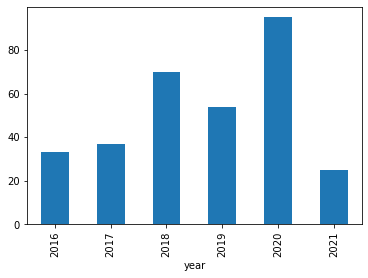

In [85]:
print(df[df['latitude'].isna()].groupby('year')['id'].count()) #falta de coordenadas
#print(df.groupby('year')['id'].count()) #muertos agrupados por año (NO RELEVANTE)

df[df['latitude'].isna()].groupby('year')['id'].count().plot(kind='bar')


##  Muertes con camara corporal y sin ella por años

-Muchas más muertes sin camara corporal

body_camera
False    5689
True      911
Name: id, dtype: int64


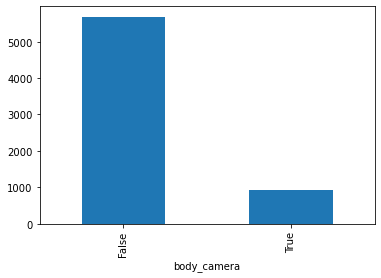

year
2015     994
2016     957
2017     985
2018     990
2019     999
2020    1021
2021     654
Name: body_camera, dtype: int64


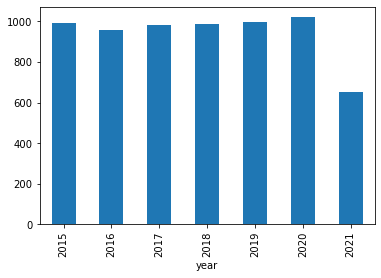

In [87]:
print(df.groupby('body_camera')['id'].count())
df.groupby('body_camera')['id'].count().plot(kind='bar')
plt.show()
print(df.groupby('year')['body_camera'].count())
df.groupby('year')['body_camera'].count().plot(kind='bar')
plt.show()

## Huidos y no huidos por etnias

In [297]:
print('No huyen\n', df[df['flee']=='Not fleeing']['race'].value_counts())
print('Huyen\n', df[df['flee']!='Not fleeing']['race'].value_counts())

No huyen
 W    1904
B     857
H     630
A      79
N      49
O      29
Name: race, dtype: int64
Huyen
 W    1058
B     698
H     455
N      42
A      27
O      18
Name: race, dtype: int64


## Huidos por años 

In [294]:
print('Huyen\n',df['flee'].value_counts())
print('\nDesglose por años\n',df.groupby('year')['flee'].value_counts())

Huyen
 Not fleeing    3953
Car            1061
Foot            847
Other           248
Name: flee, dtype: int64

Desglose por años
 year  flee       
2015  Not fleeing    717
      Car            143
      Foot           108
      Other           19
2016  Not fleeing    626
      Car            143
      Foot           121
      Other           51
2017  Not fleeing    598
      Car            181
      Foot           123
      Other           33
2018  Not fleeing    615
      Car            162
      Foot           137
      Other           24
2019  Not fleeing    593
      Car            173
      Foot           138
      Other           21
2020  Not fleeing    534
      Car            177
      Foot           142
      Other           47
2021  Not fleeing    270
      Car             82
      Foot            78
      Other           53
Name: flee, dtype: int64


## Tipos de huida y etnia 

In [255]:
print(df.groupby('flee')['race'].value_counts())

flee         race
Car          W        483
             B        246
             H        180
             A         11
             N         10
             O         10
Foot         B        303
             W        287
             H        150
             N         17
             A         10
             O          5
Not fleeing  W       1904
             B        857
             H        630
             A         79
             N         49
             O         29
Other        W         97
             B         61
             H         54
             N          4
             O          2
             A          1
Name: race, dtype: int64


## Muertos por etnia 

In [293]:
print('muertos por etnia\n\n',
      df.groupby('race')['id'].count().sort_values(ascending=False))
print('\nmuertos desglosados por año\n',
      df.groupby('year')['race'].value_counts())

muertos por etnia

 race
W    2962
B    1555
H    1085
A     106
N      91
O      47
Name: id, dtype: int64

muertos desglosados por año
 year  race
2015  W       502
      B       258
      H       173
      A        15
      O        14
      N         9
2016  W       465
      B       236
      H       161
      N        17
      A        15
      O        11
2017  W       460
      B       223
      H       181
      N        22
      A        16
      O         6
2018  W       461
      B       232
      H       168
      A        22
      N        16
      O         4
2019  W       424
      B       251
      H       168
      A        20
      N        13
      O         9
2020  W       459
      B       244
      H       171
      A        15
      N         9
      O         3
2021  W       191
      B       111
      H        63
      N         5
      A         3
Name: race, dtype: int64
